In [2]:
import signatory
import matplotlib.pyplot as plt
import matplotlib
from insertion import invert_signature
import torch
import numpy as np
import math

## Semi-circle 

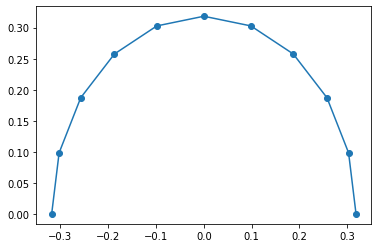

In [2]:
# Create a semi-circle path

points = np.arange(0,1.1,0.1)

x1 = 1/(math.pi)*np.cos(math.pi*points)

x2 = 1/(math.pi)*np.sin(math.pi*points)

path = torch.tensor(np.array((x1,x2)).T).unsqueeze(0)

plt.plot(path[0, :, 0], path[0, :, 1], linestyle='-', marker='o')
plt.show()

In [3]:
# Compute its signature
depth = 10
signature = signatory.signature(path, depth)

# Invert the signature
reconstructed_path = invert_signature(signature, depth, path.shape[2], initial_position=path[:, 0, :])

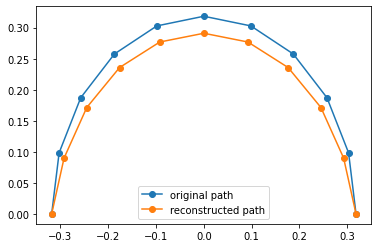

In [4]:
plt.plot(path[0, :, 0], path[0, :, 1], linestyle='-', marker='o', label="original path")
plt.plot(reconstructed_path[0, :, 0], reconstructed_path[0, :, 1], marker='o', label="reconstructed path")
plt.legend()
plt.show()

##  Spiral

/Users/adelinefermanian/Documents/Thèse/Linus/Signature-inversion/venv/lib/python3.8/site-packages/mpl_toolkits/mplot3d/proj3d.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array([xs, ys, zs, np.ones_like(xs)])


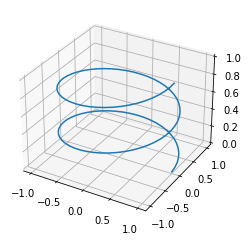

In [4]:
from mpl_toolkits.mplot3d import Axes3D

# Generate a spiral
times = np.linspace(0,1,num=100)

path = torch.tensor(np.transpose(np.array([np.cos(4*math.pi*times), np.sin(4*math.pi*times), times]))).unsqueeze(0)


fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(path[0, :, 0], path[0, :, 1], path[0, :, 2], linestyle='-')
plt.show()

In [8]:
# Compute the signature
depth = 10
signature = signatory.signature(path, depth)

# Invert the signature
reconstructed_path = invert_signature(signature, depth, path.shape[2], initial_position=path[:, 0, :])

/Users/adelinefermanian/Documents/Thèse/Linus/Signature-inversion/venv/lib/python3.8/site-packages/mpl_toolkits/mplot3d/proj3d.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array([xs, ys, zs, np.ones_like(xs)])


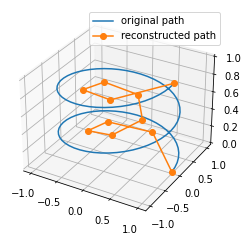

In [9]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(path[0, :, 0], path[0, :, 1], path[0, :, 2], linestyle='-', label="original path")
ax.plot(reconstructed_path[0, :, 0], reconstructed_path[0, :, 1], reconstructed_path[0, :, 2], linestyle='-', marker='o', label="reconstructed path")
plt.legend()
plt.show()

# Pendigits

In [10]:
from get_data import get_arff

X,y=get_arff(name='Pendigits')

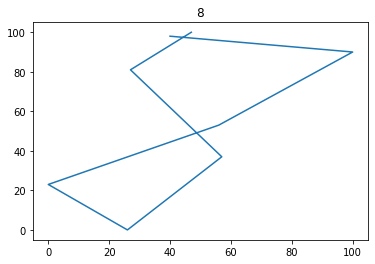

In [13]:
# Get a batch of 10 paths
batch = 10
path = torch.tensor(X[:batch,:,:])

plt.plot(path[0, :, 0], path[0, :, 1])
plt.title(y[0])
plt.show()

In [14]:
depth = 10
signature = signatory.signature(path, depth)

reconstructed_path=invert_signature(signature, depth, path.shape[2], initial_position=path[:, 0, :])

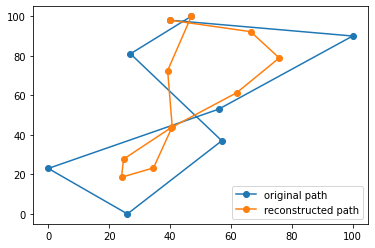

In [16]:
plt.plot(path[0, :, 0], path[0, :,1], linestyle='-', marker='o', label="original path")
plt.plot(reconstructed_path[0, :, 0], reconstructed_path[0, :, 1], marker='o', label="reconstructed path")
plt.legend()
plt.show()

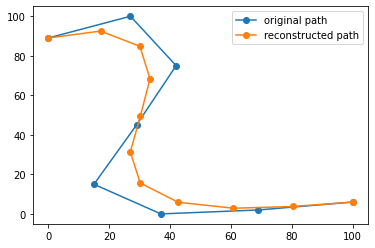

In [17]:
plt.plot(path[1, :, 0], path[1, :,1], linestyle='-', marker='o', label="original path")
plt.plot(reconstructed_path[1, :, 0], reconstructed_path[1, :, 1], marker='o', label="reconstructed path")
plt.legend()
plt.show()